

# `torch.nn.Module`

`torch.nn.Module` is the base class for all neural networks in PyTorch.
Any model or layer must inherit from it.

---

## Key points

* Stores learnable parameters and sub-layers
* Enables automatic gradient computation
* Handles training and evaluation modes
* Allows easy movement to CPU/GPU
* Supports saving and loading weights

---



In [4]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):

    super().__init__()       #  this is to  initlize PyTorch’s internal machinery like registers layers, enables GPU movement etc...
    self.linear=nn.Linear(num_features,1)    # nn.linear is a class  and self.linear is object of that class    Internally creates: a weight matrix ,a bias vector both are learnable parameters
    self.activation=nn.Sigmoid()
  def forward(self,features):
    out=self.linear(features)   #Because PyTorch layers override __call__ method.  this  Actually means out = self.linear.forward(features)
    out=self.activation(out)
    return out

## 1. torch.nn
* `torch` → Main PyTorch library for tensors and GPU operations
* `torch.nn` → Contains neural network layers, activation functions, and training utilities

---

## 2. Creating a Model Class

```python
class Model(nn.Module):
```

* Defines a custom neural network class named `Model`
* Inherits from `nn.Module`, which is the base class for all neural networks in PyTorch

---

## 3. The Constructor: `__init__()`

```python
def __init__(self, num_features):
    super().__init__()
```

### Purpose of `super().__init__()`

It initializes the parent class `nn.Module`. This is necessary because:

* It registers layers inside the model
* It tracks learnable parameters
* It allows the model to move to GPU using `.to('cuda')`
* It enables `.parameters()` method for the optimizer
* It handles training/evaluation mode using `.train()` and `.eval()`

If you do not call `super()`, the model will not behave as a proper PyTorch module.

---

## 4. Creating the Linear Layer

```python
self.linear = nn.Linear(num_features, 1)
```

### What is `nn.Linear`?

`nn.Linear(in_features, out_features)` is a fully connected (dense) layer.

It internally creates:

* A weight matrix
* A bias vector

Both are trainable parameters.

Example:
If `num_features = 3`, the operation is:

```
output = x1*w1 + x2*w2 + x3*w3 + bias
```

---

## 5. Creating the Activation Layer

```python
self.activation = nn.Sigmoid()
```

* Defines a sigmoid activation function
* Converts the output into a value between 0 and 1
* Commonly used for binary classification

---

## 6. The Forward Pass

```python
def forward(self, features):
    out = self.linear(features)
    out = self.activation(out)
    return out
```

### What happens inside `forward()`?

1. The input is passed to the linear layer:

   ```python
   out = self.linear(features)
   ```

2. The output is passed to the sigmoid activation:

   ```python
   out = self.activation(out)
   ```

3. Final output is returned:

   ```python
   return out
   ```

---

## 7. Why does `self.linear(features)` work?

PyTorch layers override the `__call__()` method, so calling the layer like a function:

```
self.linear(features)
```

is actually equivalent to:

```
self.linear.forward(features)
```

This design makes layers easy to use and read.

---

# Summary Table

| Code                 | Explanation                                           |
| -------------------- | ----------------------------------------------------- |
| `nn.Module`          | Base class for all PyTorch models                     |
| `super().__init__()` | Initializes the parent class and registers layers     |
| `nn.Linear(a, b)`    | Fully connected layer with `a` inputs and `b` outputs |
| `self.linear`        | Stores the layer inside the model                     |
| `nn.Sigmoid()`       | Activation function mapping values to [0, 1]          |
| `forward()`          | Defines how the input flows through the network       |
| `self.linear(x)`     | Applies the linear transformation                     |
| `self.activation(x)` | Applies nonlinear activation                          |



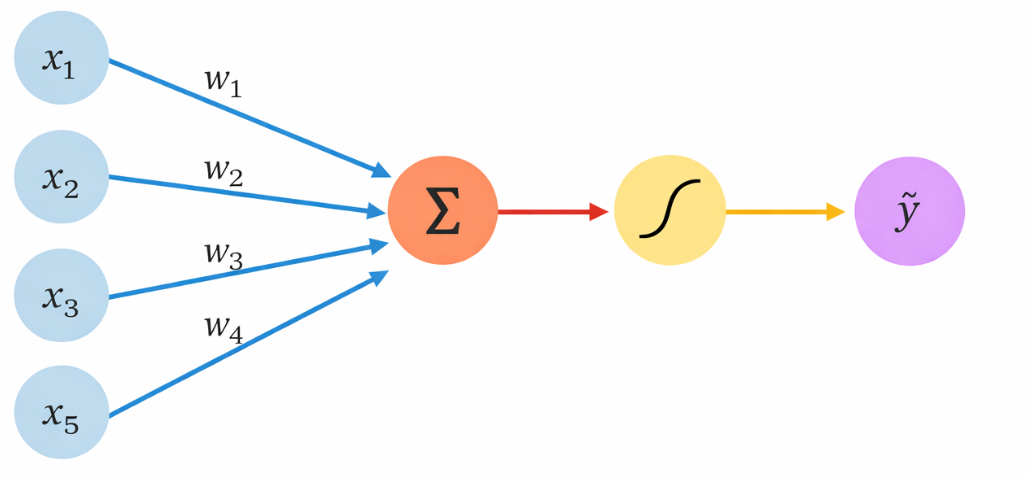

In [6]:
# create Dataset
features=torch.rand(10,5)

# create model
model=Model(features.shape[1])

# call model for forward pass

# model.forward(features) this is not the standard way of callin the  forward  function on  model object as  pytorch overrides  __call__() method  so calling



#**When you call `model(features)`, PyTorch automatically runs the `__call__()` method of `nn.Module`, which internally calls your `forward()` function. Therefore, `model(x)` is just a clean way of writing `forward(x)` with all PyTorch features handled automatically.**


In [8]:
# so insted of model.forward(features)  we directley do
model(features)

tensor([[0.4569],
        [0.5287],
        [0.4986],
        [0.4898],
        [0.4874],
        [0.4760],
        [0.5166],
        [0.5086],
        [0.4767],
        [0.4592]], grad_fn=<SigmoidBackward0>)

In [16]:
print(f"weights of model are :  \n{model.linear.weight}\n")
print(f"bias of model is :  \n{model.linear.bias}\n")   #  as we know thtt self.linear  is a obj of  nn.Linear class  so  there is  alredy  parameter  defined  initalley ffor  this  class

weights of model are :  
Parameter containing:
tensor([[ 0.0066,  0.1881,  0.2131, -0.2057, -0.1852]], requires_grad=True)

bias of model is :  
Parameter containing:
tensor([-0.0147], requires_grad=True)



In [17]:
! pip install torchinfo  #  this is  th e librarey to visualley  the model

In [19]:
from torchinfo import  summary
summary(model,input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

# more complex network of shape(5,3,1)


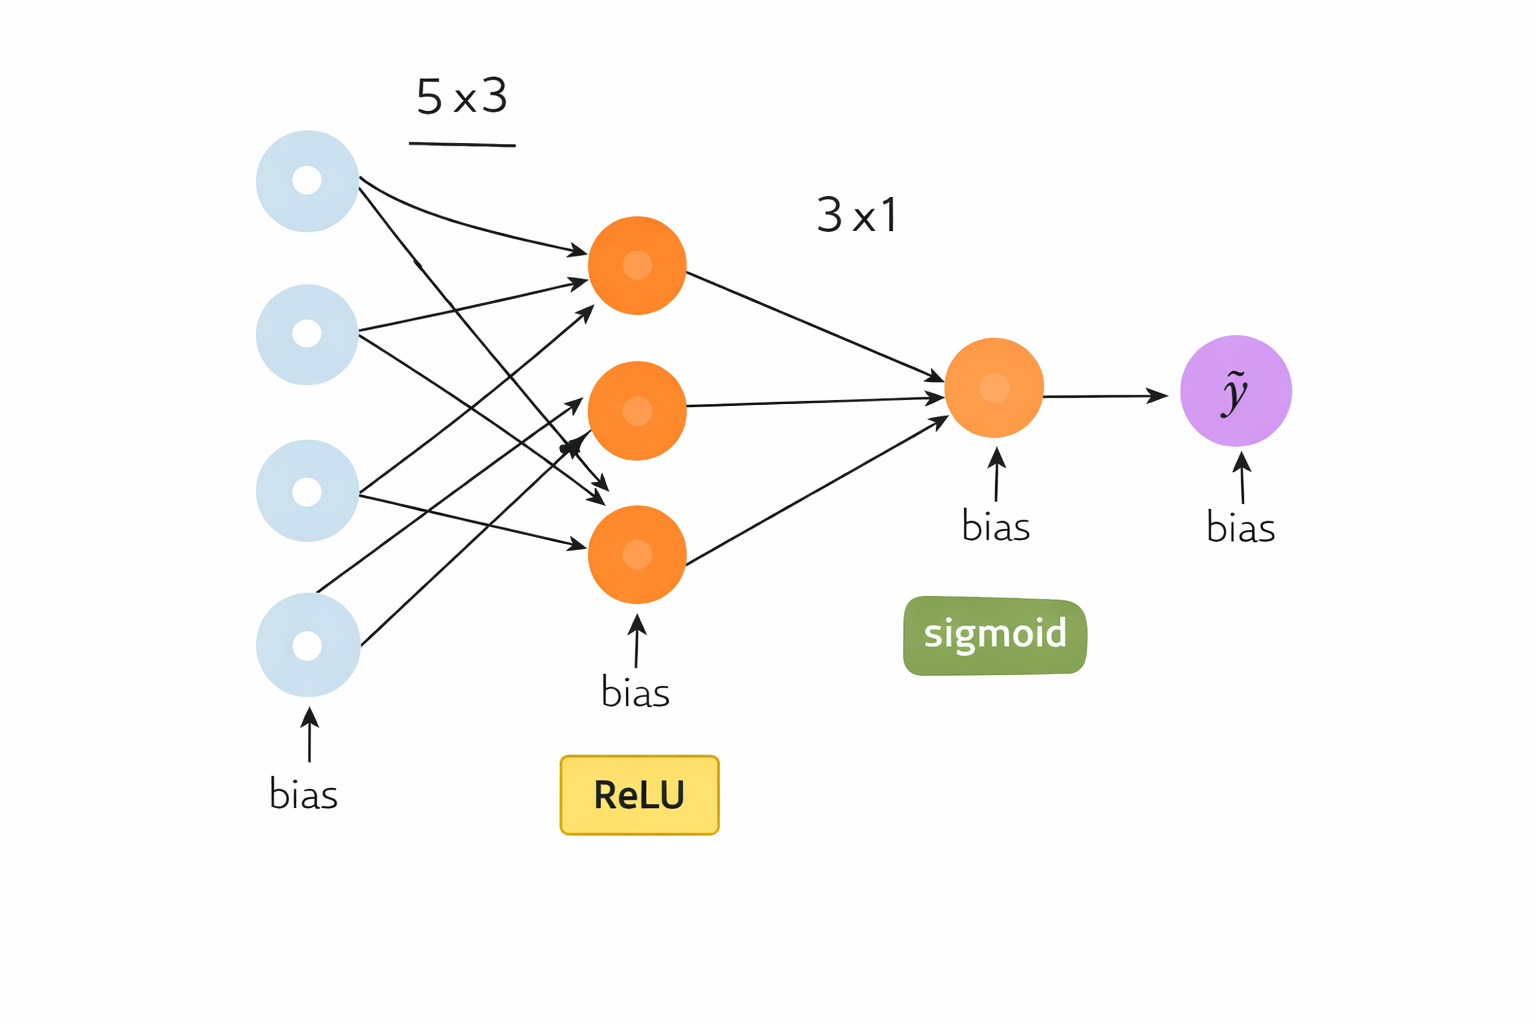

In [31]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):

    super().__init__()
    self.linear1=nn.Linear(num_features,3)    #   nn.Linear(num_features,3)  that means it  took input   num_feature  feature and output 3 features
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(3,1)
    self.sigmoid=nn.Sigmoid()


  def forward(self,features):
    out=self.linear1(features)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

In [32]:
# create Dataset
features=torch.rand(10,5)

# create model
model=Model(features.shape[1])

model(features)

tensor([[0.3703],
        [0.3725],
        [0.3703],
        [0.3844],
        [0.3700],
        [0.3718],
        [0.3714],
        [0.3746],
        [0.3712],
        [0.3709]], grad_fn=<SigmoidBackward0>)


**To build more complex neural networks with many layers (10–100+), manually defining each layer like `self.linear2 = nn.Linear(in_features, out_features)` becomes impractical.
To solve this, PyTorch provides *container modules* such as `nn.Sequential`, `nn.ModuleList`, and `nn.ModuleDict`, which allow us to create and manage multiple layers efficiently.**

---


In [33]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.network=nn.Sequential(
    nn.Linear(num_features,3),
    nn.ReLU(),
    nn.Linear(3,1),
    nn.Sigmoid(),
)



  def forward(self,features):
    out=self.network(features)
    return out

In [34]:
# create Dataset
features=torch.rand(10,5)

# create model
model=Model(features.shape[1])

model(features)

tensor([[0.5414],
        [0.5660],
        [0.5743],
        [0.5494],
        [0.5566],
        [0.5593],
        [0.5380],
        [0.5568],
        [0.5147],
        [0.5615]], grad_fn=<SigmoidBackward0>)

# Now lets use this to  train  model

In [38]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [39]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [40]:
learning_rate = 0.1
epochs = 25
# define loss function
loss_function = nn.BCELoss()

#The torch.optim module

torch.optimis a module in PyTorch that provides a variety of optimization algorithms used to update the parameters of your model during training.
It includes common optimizers like Stochastic Gradient Descent (SGD), Adam, RMSprop, and more.
It handles weight updates efficiently, including additional features like learning rate scheduling and weight decay (regularization).




The model.parameters()method in PyTorch retrieves an iterator over all the trainable parameters(weights and biases)in a model. These parameters are instances of torch.nn.Parameterand include:
Weights: The weight matrices of layers like nn.Linear, nn.Conv2d, etc.
•
Biases: The bias terms of layers (if they exist).
•
The optimizer uses these parameters to compute gradients and update them during training.

In [41]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.7031641006469727
Epoch: 2, Loss: 0.5345795154571533
Epoch: 3, Loss: 0.44480299949645996
Epoch: 4, Loss: 0.38919690251350403
Epoch: 5, Loss: 0.35072436928749084
Epoch: 6, Loss: 0.32212701439857483
Epoch: 7, Loss: 0.2998020052909851
Epoch: 8, Loss: 0.28174522519111633
Epoch: 9, Loss: 0.2667456567287445
Epoch: 10, Loss: 0.25402405858039856
Epoch: 11, Loss: 0.24305391311645508
Epoch: 12, Loss: 0.23346534371376038
Epoch: 13, Loss: 0.22498999536037445
Epoch: 14, Loss: 0.21742786467075348
Epoch: 15, Loss: 0.21062639355659485
Epoch: 16, Loss: 0.2044670581817627
Epoch: 17, Loss: 0.19885599613189697
Epoch: 18, Loss: 0.19371774792671204
Epoch: 19, Loss: 0.188990980386734
Epoch: 20, Loss: 0.1846250742673874
Epoch: 21, Loss: 0.18057787418365479
Epoch: 22, Loss: 0.17681385576725006
Epoch: 23, Loss: 0.1733028143644333
Epoch: 24, Loss: 0.17001892626285553
Epoch: 25, Loss: 0.1669398695230484


In [42]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5366266369819641



## 1. Creating the Neural Network Class

### `class MySimpleNN(nn.Module)`

Defines a custom neural network that inherits from `nn.Module`.

### `__init__()`

```python
self.linear = nn.Linear(num_features, 1)
self.sigmoid = nn.Sigmoid()
```

* `nn.Linear(num_features, 1)`
  Fully connected layer: converts input → 1 output.

* `nn.Sigmoid()`
  Activation function: converts output into a value between 0 and 1.

### `forward()`

```python
out = self.linear(features)
out = self.sigmoid(out)
return out
```

Defines how data flows through the model.

---

# Training Code Explanation

```python
learning_rate = 0.1
epochs = 25
```

* `learning_rate` → step size of parameter update
* `epochs` → how many times we train over the entire dataset

---

## 2. Defining the Loss Function

```python
loss_function = nn.BCELoss()
```

* Binary Cross Entropy Loss
* Used for binary classification
* Measures the difference between predicted probability and actual label

---

## 3. Creating the Model

```python
model = MySimpleNN(X_train_tensor.shape[1])
```

* Creates the neural network object
* `num_features = number of columns` in training data

---

## 4. Defining the Optimizer

```python
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
```

* `SGD` = Stochastic Gradient Descent
* Takes parameters of the model (weights + biases)
* Updates them based on gradients
* Uses the defined learning rate

---

# 5. Training Loop (Important Part)

```python
for epoch in range(epochs):
```

Runs the training process for 25 epochs.

---

## Step-by-step inside the loop

### Step 1: Forward Pass

```python
y_pred = model(X_train_tensor)
```

* Input training tensor is passed through the model
* Output is predicted values (probabilities)

---

### Step 2: Calculate Loss

```python
loss = loss_function(y_pred, y_train_tensor.view(-1, 1))
```

* Compares predicted output and true labels
* `.view(-1,1)` reshapes labels to match prediction shape (N × 1)

---

### Step 3: Clear Old Gradients

```python
optimizer.zero_grad()
```

* Clears previously stored gradients
* Without this, gradients would accumulate

---

### Step 4: Backward Pass (Gradient Calculation)

```python
loss.backward()
```

* Computes gradients of the loss w.r.t each model parameter
* PyTorch automatically applies backpropagation

---

### Step 5: Update Parameters

```python
optimizer.step()
```

* Updates model weights using gradients
* This is how the model learns

---

### Step 6: Print Loss

```python
print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')
```

* Shows loss after each epoch
* Helps track training progress

---

# Full Training Flow Summary

| Step | Code                    | What Happens                        |
| ---- | ----------------------- | ----------------------------------- |
| 1    | `model(x)`              | Forward pass → predictions          |
| 2    | `loss = ...`            | Compute error                       |
| 3    | `optimizer.zero_grad()` | Reset gradients                     |
| 4    | `loss.backward()`       | Compute gradients (backpropagation) |
| 5    | `optimizer.step()`      | Update weights                      |
| 6    | `print(loss)`           | Display progress                    |

---

